In [76]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [77]:
df = pd.read_csv('NF-BoT-IoT1.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,9.2,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.0,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.0,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.0,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.0,8374706,0,9086,0,0,4175916,0,Benign


In [78]:
df.isnull().sum()

,0
IPV4_SRC_ADDR,0
L4_SRC_PORT,0
IPV4_DST_ADDR,0
L4_DST_PORT,0
PROTOCOL,0
L7_PROTO,0
IN_BYTES,0
OUT_BYTES,0
IN_PKTS,0
OUT_PKTS,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               600100 non-null  object 
 1   L4_SRC_PORT                 600100 non-null  int64  
 2   IPV4_DST_ADDR               600100 non-null  object 
 3   L4_DST_PORT                 600100 non-null  int64  
 4   PROTOCOL                    600100 non-null  int64  
 5   L7_PROTO                    600100 non-null  float64
 6   IN_BYTES                    600100 non-null  int64  
 7   OUT_BYTES                   600100 non-null  int64  
 8   IN_PKTS                     600100 non-null  int64  
 9   OUT_PKTS                    600100 non-null  int64  
 10  TCP_FLAGS                   600100 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 12  Label                       600100 non-null  int64  
 13  Attack        

In [80]:
#Check for duplicates
df.duplicated().sum()

0

In [81]:
df.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1, inplace = True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 600100 non-null  int64  
 1   L4_DST_PORT                 600100 non-null  int64  
 2   PROTOCOL                    600100 non-null  int64  
 3   L7_PROTO                    600100 non-null  float64
 4   IN_BYTES                    600100 non-null  int64  
 5   OUT_BYTES                   600100 non-null  int64  
 6   IN_PKTS                     600100 non-null  int64  
 7   OUT_PKTS                    600100 non-null  int64  
 8   TCP_FLAGS                   600100 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 10  Label                       600100 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 50.4 MB


#Feature Selection
Checking for correlation

In [83]:
#Features with negligible correlation
Correlation_matrix= df.corr()
non_correlated=Correlation_matrix[abs(Correlation_matrix['Label'])<0.1]
non_correlated


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
L4_DST_PORT,-0.058956,1.000000,0.210926,-0.107788,-0.008967,0.009567,-0.021223,-0.004728,-0.197868,0.046861,-0.019538
OUT_BYTES,-0.029019,0.009567,0.007441,-0.001660,0.061473,1.000000,0.211921,0.568696,-0.010458,0.003238,-0.027669
FLOW_DURATION_MILLISECONDS,0.006821,0.046861,-0.404887,0.048403,0.007102,0.003238,0.012614,0.006727,0.219374,1.000000,0.016333


<Axes: >

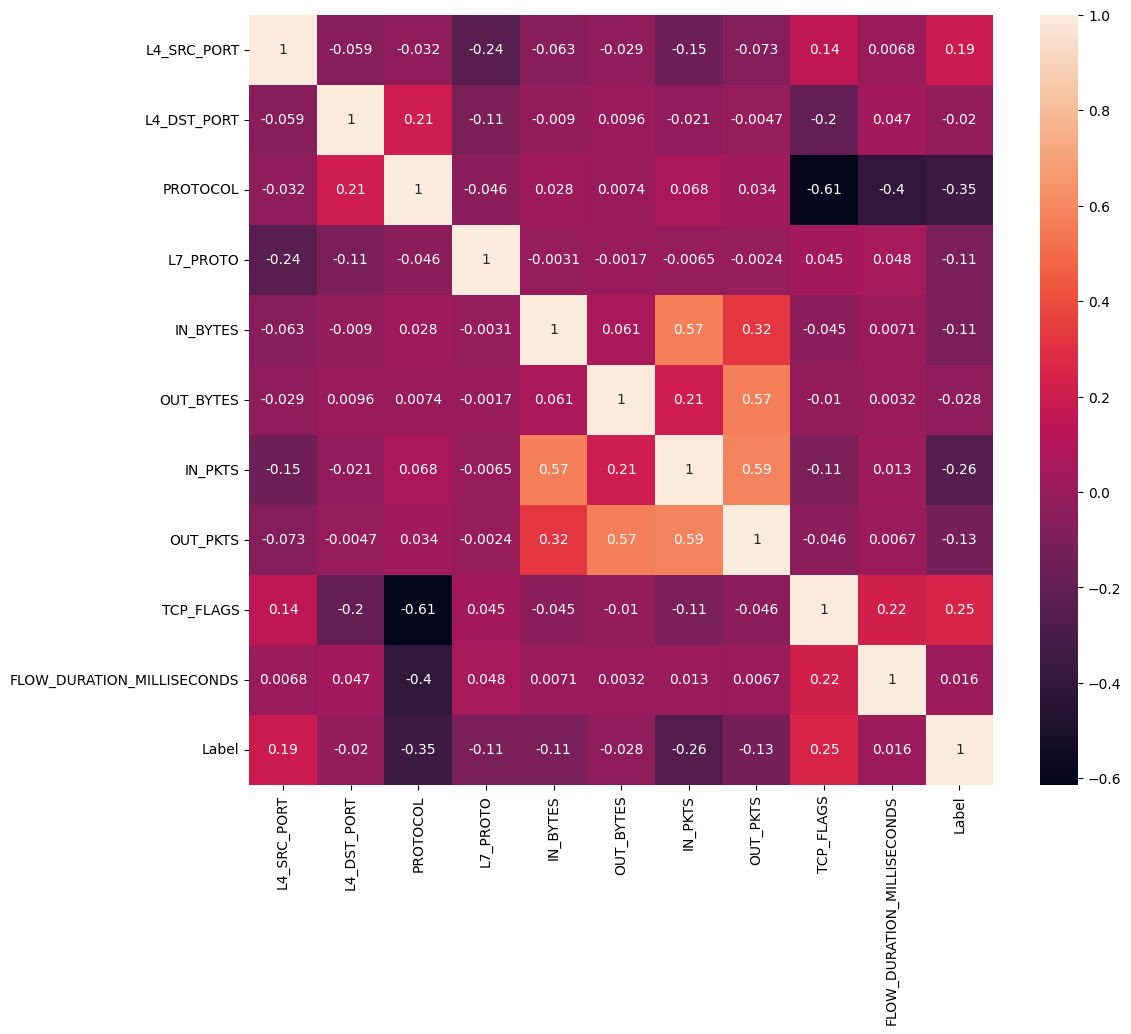

In [84]:
#Plot the figure
fig, ax=plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

In [85]:
Correlation_Matrix= df.corr()
non_correlated= Correlation_Matrix.index[abs(Correlation_Matrix['Label'])<0.1]
non_correlated


Index(['L4_DST_PORT', 'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS'], dtype='object')

In [86]:
df.drop(['L4_DST_PORT', 'IN_BYTES', 'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS'], axis=1, inplace=True)

In [87]:
df

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.200,1,1,0,0
1,49160,6,0.000,4521,4049,24,1
2,3456,17,0.000,9086,9086,0,0
3,80,6,7.000,9086,9086,0,0
4,80,6,7.000,9086,0,0,0
...,...,...,...,...,...,...,...
600095,80,6,7.000,2523,0,0,0
600096,0,6,0.000,1513,0,0,0
600097,365,17,0.000,1357,0,0,0
600098,50850,6,222.178,32,32,24,0


In [88]:
df['Label'].value_counts()

,count
Label,
1,586241
0,13859


#SMOTE OVERSAMPLING

In [89]:
normal = df[df['Label']==0]
attack = df[df['Label']==1]

In [90]:
normal.shape

(13859, 7)

In [91]:
attack.shape

(586241, 7)

In [92]:
attack_new = attack.sample(n=13859)

In [93]:
attack_new.shape

(13859, 7)

In [94]:
new_data = pd.concat([normal, attack_new], ignore_index=True)
new_data

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.2,1,1,0,0
1,3456,17,0.0,9086,9086,0,0
2,80,6,7.0,9086,9086,0,0
3,80,6,7.0,9086,0,0,0
4,0,6,0.0,5452,0,0,0
...,...,...,...,...,...,...,...
27713,62138,6,127.0,2,1,22,1
27714,33904,6,7.0,8,4,27,1
27715,55973,6,0.0,1,1,22,1
27716,42209,6,0.0,1,1,22,1


In [95]:
new_data['Label'].value_counts()

,count
Label,
0,13859
1,13859


In [96]:
new_data

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.2,1,1,0,0
1,3456,17,0.0,9086,9086,0,0
2,80,6,7.0,9086,9086,0,0
3,80,6,7.0,9086,0,0,0
4,0,6,0.0,5452,0,0,0
...,...,...,...,...,...,...,...
27713,62138,6,127.0,2,1,22,1
27714,33904,6,7.0,8,4,27,1
27715,55973,6,0.0,1,1,22,1
27716,42209,6,0.0,1,1,22,1


In [97]:
y=new_data['Label']
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
27713,1
27714,1
27715,1
27716,1


In [98]:
X=new_data.drop('Label', axis=1)

#Splitting the dataset


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Normalization

In [100]:
#Using standard scaler to standardize and transform the data in such a way that the features have a similar scale,
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)



In [101]:
X_train

array([[-1.86681549, -0.66569468,  3.47794895, -0.19599633, -0.11183652,
         0.38663501],
       [ 0.83324355, -0.66569468, -0.23141163, -0.19233861, -0.10765649,
         0.96827189],
       [ 0.51070945, -0.66569468, -0.23141163, -0.1950819 , -0.11322986,
         0.55281697],
       ...,
       [-0.08271942,  1.48336564, -0.26150401, -0.19599633, -0.11183652,
        -1.27518467],
       [ 0.02585013, -0.66569468, -0.34381649, -0.19599633, -0.11183652,
         0.55281697],
       [ 1.07530285, -0.66569468, -0.34381649, -0.19599633, -0.11183652,
         0.55281697]])

In [102]:
X_test

array([[ 0.62774446, -0.66569468, -0.34381649, -0.19599633, -0.11183652,
         0.55281697],
       [ 0.74213402,  1.48336564, -0.34381649, -0.19599633, -0.11322986,
        -1.27518467],
       [-2.07263204,  1.48336564, -0.34381649,  2.10196393, -0.11322986,
        -1.27518467],
       ...,
       [ 0.3505535 , -0.66569468, -0.34381649, -0.19599633, -0.11183652,
         0.55281697],
       [-1.91480408, -0.66569468,  3.47794895, -0.19599633, -0.11183652,
         0.38663501],
       [-0.11488817, -0.66569468, -0.34381649, -0.19050975, -0.1048698 ,
         0.96827189]])

Support Vector Classifier

In [103]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear', random_state=42)

In [104]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Predicting the test result

In [105]:
y_pred= classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [106]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 1]
 [1 0]]


In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [108]:
accuracy_score(y_test, y_pred)

0.9067460317460317

In [109]:
precision_score(y_test, y_pred)

0.874451569355383

In [110]:
recall_score(y_test, y_pred)

0.9470029239766082

In [111]:
f1_score(y_test, y_pred)

0.9092823302333742

In [112]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[2436  372]
 [ 145 2591]]


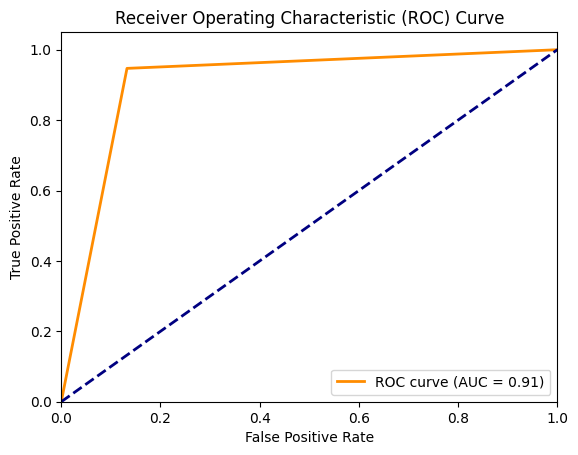

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#RANDOM FOREST

In [114]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=42)
classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [115]:
y_pred2=classifier2.predict(X_test)
y_pred2

array([1, 0, 0, ..., 1, 1, 0])

In [116]:
accuracy_score(y_test, y_pred2)

0.9781746031746031

In [117]:
precision_score(y_test, y_pred2)

0.989883851629824

In [118]:
recall_score(y_test, y_pred2)

0.9656432748538012

In [119]:
f1_score(y_test, y_pred2)

0.977613320999075

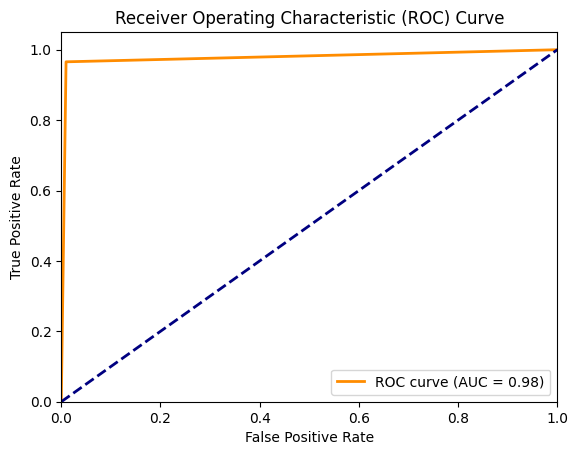

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [122]:
y_pred3= classifier3.predict(X_test)

In [123]:
accuracy_score(y_test, y_pred3)

0.8699494949494949

In [124]:
precision_score(y_test, y_pred3)

0.8199428389965068

In [125]:
recall_score(y_test, y_pred3)

0.9437134502923976

In [126]:
f1_score(y_test, y_pred3)

0.8774851316907392

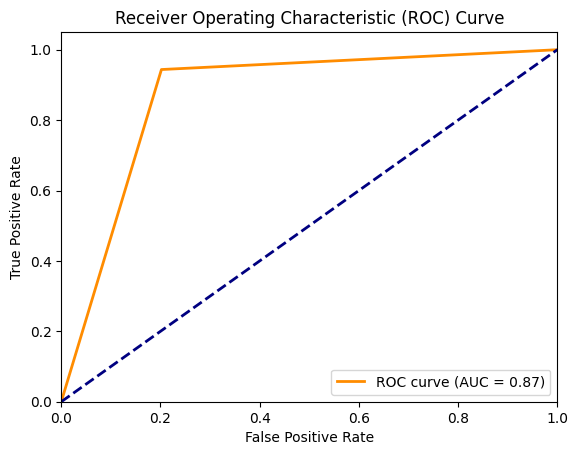

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
classifier9= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier9.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
y_pred4= classifier9.predict(X_test)


In [130]:
accuracy_score(y_pred4, y_test)

0.976010101010101

In [131]:
precision_score(y_pred4, y_test)

0.9616228070175439

In [132]:
recall_score(y_pred4, y_test)

0.9894697254606996

In [133]:
f1_score(y_pred4, y_test)

0.975347544022243

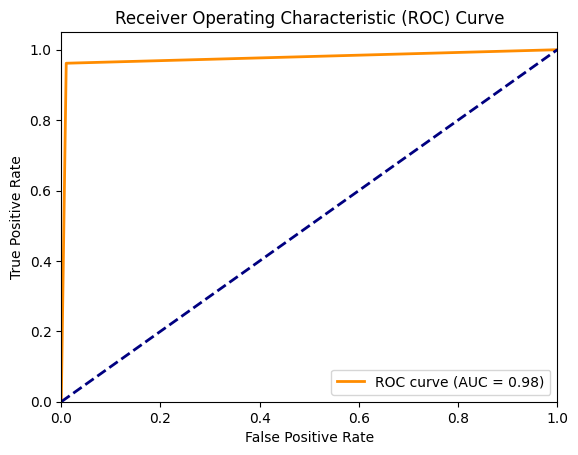

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XGBOOST

In [135]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
y_pred5= classifier6.predict(X_test)

In [137]:
accuracy_score(y_pred5, y_test)

0.9772727272727273

In [138]:
precision_score(y_pred5, y_test)

0.9608918128654971

In [139]:
recall_score(y_pred5, y_test)

0.9928247734138973

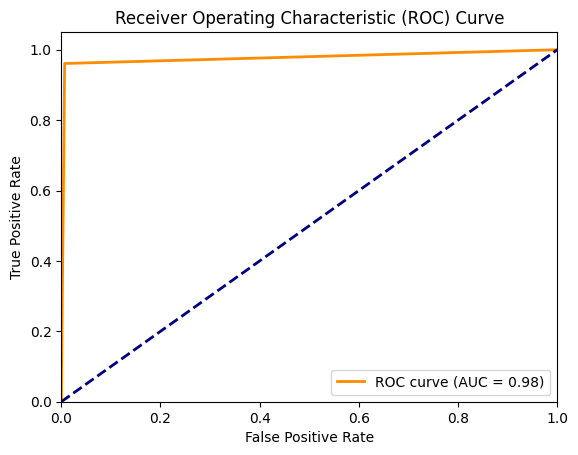

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


MLP ANN

In [141]:
import tensorflow as tf

In [142]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [143]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [144]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7960 - loss: 0.5516
Epoch 2/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8974 - loss: 0.3143
Epoch 3/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9026 - loss: 0.2909
Epoch 4/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9063 - loss: 0.2696
Epoch 5/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9033 - loss: 0.2536


In [145]:
y_pred6 = ann.predict(X_test)

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [146]:
y_pred6=(y_pred > 0.5)
y_pred6
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 1]
 [1 0]]


In [147]:
accuracy_score(y_test, y_pred6)

0.9067460317460317

In [148]:
precision_score(y_pred6, y_test)

0.9470029239766082

In [149]:
recall_score(y_pred6, y_test)

0.874451569355383

In [150]:
f1_score(y_pred6, y_test)

0.9758364312267659

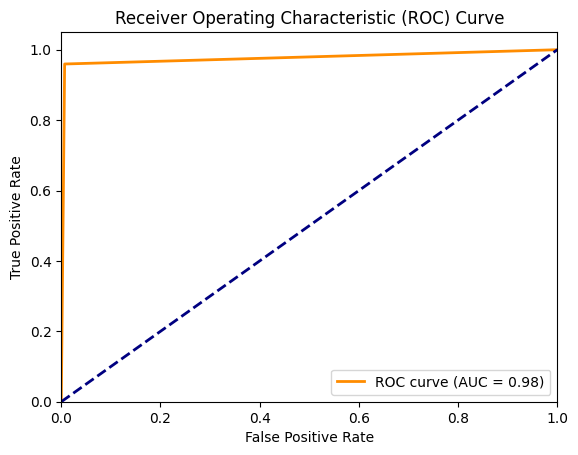

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred6)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
